In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# Reading_The_CSV

In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape

(14640, 15)

In [5]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

# Data_Refining

In [6]:
df2 = df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_id', 'user_timezone', 'tweet_created'], axis='columns')
df2.shape

(14640, 9)

In [7]:
mean_neg_confidence = df['negativereason_confidence'].mean()
df2['negativereason_confidence'].fillna(mean_neg_confidence, inplace=True)

In [8]:
df2.isnull().sum()

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence          0
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_location                  4733
dtype: int64

In [9]:
df2.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
0,neutral,1.0000,NaN,0.638298,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN
1,positive,0.3486,NaN,0.000000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN
2,neutral,0.6837,NaN,0.638298,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,Lets Play
3,negative,1.0000,Bad Flight,0.703300,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN
4,negative,1.0000,Can't Tell,1.000000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN


In [10]:
df2.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [11]:
df2['negativereason'].fillna('No Issue', inplace=True)

In [12]:
df2.dropna(inplace=True)
df2.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
2,neutral,0.6837,No Issue,0.638298,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,Lets Play
6,positive,0.6745,No Issue,0.000000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",San Francisco CA
7,neutral,0.6340,No Issue,0.638298,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,Los Angeles
8,positive,0.6559,No Issue,0.638298,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",San Diego
9,positive,1.0000,No Issue,0.638298,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",Los Angeles


In [13]:
df2.isnull().sum()

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_location                  0
dtype: int64

In [14]:
df2['negativereason'].value_counts()

No Issue                       3871
Customer Service Issue         1882
Late Flight                    1106
Can't Tell                      804
Cancelled Flight                523
Lost Luggage                    453
Bad Flight                      389
Flight Booking Problems         361
Flight Attendant Complaints     336
longlines                       127
Damaged Luggage                  55
Name: negativereason, dtype: int64

In [15]:
print(df2['airline'].value_counts())

United            2633
American          1848
US Airways        1844
Delta             1604
Southwest         1596
Virgin America     382
Name: airline, dtype: int64


In [16]:
print(df['retweet_count'].value_counts())
df.shape

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64


(14640, 15)

In [17]:
df['name'].value_counts()

JetBlueNews       63
kbosspotter       32
_mhertz           29
otisday           28
throthra          27
                  ..
ChrisJLeary        1
tracy_edes         1
NGottesman         1
chadlacalamita     1
sanyabun           1
Name: name, Length: 7701, dtype: int64

In [18]:
label_encoder = LabelEncoder()
df2['airline_encoded'] = label_encoder.fit_transform(df2['airline'])

In [19]:
df2['negativereason_encoded']= label_encoder.fit_transform(df2['negativereason'])

In [20]:
df2['airline_sentiment_encoded']= label_encoder.fit_transform(df2['airline_sentiment'])

In [21]:
#airline_encoded  Values

#United            4
#American          0
#US Airways        3
#Delta             1
#Southwest         2
#Virgin America    5

# Final_Data

In [22]:
df2

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location,airline_encoded,negativereason_encoded,airline_sentiment_encoded
2,neutral,0.6837,No Issue,0.638298,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,Lets Play,5,9,1
6,positive,0.6745,No Issue,0.000000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",San Francisco CA,5,9,2
7,neutral,0.6340,No Issue,0.638298,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,Los Angeles,5,9,1
8,positive,0.6559,No Issue,0.638298,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",San Diego,5,9,2
9,positive,1.0000,No Issue,0.638298,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",Los Angeles,5,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
14633,negative,1.0000,Cancelled Flight,1.000000,American,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,Los Angeles,0,2,0
14636,negative,1.0000,Customer Service Issue,1.000000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,Texas,0,3,0
14637,neutral,1.0000,No Issue,0.638298,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,"Nigeria,lagos",0,9,1
14638,negative,1.0000,Customer Service Issue,0.665900,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",New Jersey,0,3,0


In [23]:
df2.isnull().sum()

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_location                  0
airline_encoded                 0
negativereason_encoded          0
airline_sentiment_encoded       0
dtype: int64

# Visualising_Some_Data

In [24]:
grouped = df2.groupby('airline')
negative_sentiment = df2[df2['airline_sentiment'] == 'negative']
negative_counts = negative_sentiment['airline'].value_counts()
y1 = negative_counts
grouped = df2.groupby('airline')
positive_sentiment = df2[df2['airline_sentiment'] == 'positive']
positive_counts = positive_sentiment['airline'].value_counts()
y2 = positive_counts
grouped = df2.groupby('airline')
neutral_sentiment = df2[df2['airline_sentiment'] == 'neutral']
neutral_counts = neutral_sentiment['airline'].value_counts()
y3 = neutral_counts

In [25]:
y1, y2, y3

(United            1789
 US Airways        1427
 American          1275
 Southwest          785
 Delta              634
 Virgin America     126
 Name: airline, dtype: int64,
 Delta             406
 Southwest         387
 United            370
 American          254
 US Airways        187
 Virgin America    130
 Name: airline, dtype: int64,
 Delta             564
 United            474
 Southwest         424
 American          319
 US Airways        230
 Virgin America    126
 Name: airline, dtype: int64)

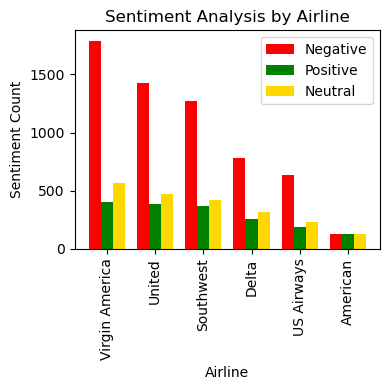

In [26]:
airlines = df['airline'].unique()
bar_width = 0.25
indices = range(len(airlines))
plt.figure(figsize=(4,4))
plt.bar(indices, y1, bar_width, label='Negative', color='red')
plt.bar([i + bar_width for i in indices], y2, bar_width, label='Positive', color='green')
plt.bar([i + 2 * bar_width for i in indices], y3, bar_width, label='Neutral', color='gold')
plt.xlabel('Airline')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Analysis by Airline')
plt.xticks([i + bar_width for i in indices], airlines, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Predicting_The_Sentiment

In [27]:
x = df2['text']
y = df2['airline_sentiment_encoded']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [28]:
x_train.shape

(7430,)

In [29]:
y_train.shape

(7430,)

In [30]:
clf_rf = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=60))
])
clf_rf.fit(x_train,y_train)
clf_rf.score(x_test,y_test)

0.7323375050464271

In [31]:
clf_svm = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('rf', SVC(kernel='rbf'))
])
clf_svm.fit(x_train,y_train)
clf_svm.score(x_test,y_test)

0.7763423496164715

In [32]:
clf_lr = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('lr', LogisticRegression())
])
clf_lr.fit(x_train,y_train)
clf_lr.score(x_test,y_test)

0.7828017763423496

In [33]:
clf_XGBC = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('XGBC', XGBClassifier())
])
clf_XGBC.fit(x_train,y_train)
clf_XGBC.score(x_test,y_test)

0.7694792087202261

In [34]:
clf_XGBR = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('XGBR', XGBRegressor())
])
clf_XGBR.fit(x_train,y_train)
clf_XGBR.score(x_test,y_test)

0.4651118073680599

# Visualising_The_Prediction


In [35]:
#NEUTRAL 0
#POSITIVE 1
#NEGATIVE 2

0.7323375050464271


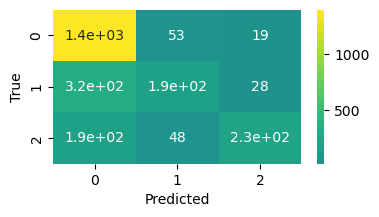

In [36]:
y_predicted = clf_rf.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True,cmap='viridis', center=0)
plt.xlabel('Predicted')
plt.ylabel('True')
print(clf_rf.score(x_test,y_test))
plt.show()

0.7763423496164715


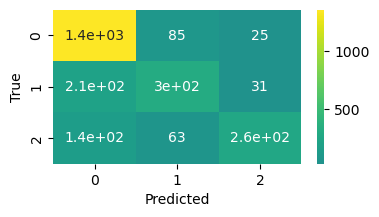

In [37]:
y_predicted = clf_svm.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True,cmap='viridis', center=0)
plt.xlabel('Predicted')
plt.ylabel('True')
print(clf_svm.score(x_test,y_test))
plt.show()

0.7828017763423496


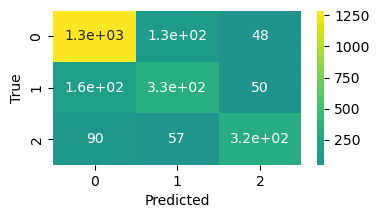

In [38]:
y_predicted = clf_lr.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True,cmap='viridis', center=0)
plt.xlabel('Predicted')
plt.ylabel('True')
print(clf_lr.score(x_test,y_test))
plt.show()

0.7694792087202261


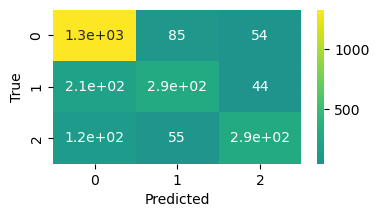

In [39]:
y_predicted = clf_XGBC.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True,cmap='viridis', center=0)
plt.xlabel('Predicted')
plt.ylabel('True')
print(clf_XGBC.score(x_test,y_test))
plt.show()

# Reason_Prediction

In [40]:
x = df2['text']
y = df2['negativereason_encoded']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [41]:
clf_rf = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=60))
])
clf_rf.fit(x_train,y_train)
clf_rf.score(x_test,y_test)

0.5720629794105773

In [42]:
clf_svm = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('svm', SVC(kernel='rbf'))
])
clf_svm.fit(x_train,y_train)
clf_svm.score(x_test,y_test)

0.6124343964473153

In [43]:
clf_lr = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('lr', LogisticRegression())
])
clf_lr.fit(x_train,y_train)
clf_lr.score(x_test,y_test)

0.6160678239806218

In [44]:
clf_XGBC = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('XGBC', XGBClassifier())
])
clf_XGBC.fit(x_train,y_train)
clf_XGBC.score(x_test,y_test)

0.6233346790472346

In [45]:
clf_XGBR = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('XGBR', XGBRegressor())
])
clf_XGBR.fit(x_train,y_train)
clf_XGBR.score(x_test,y_test)

0.2993588210664331

# Visualising_The_Data

In [46]:
#Negativereason_encoded       value

#No Issue                       9
#Customer Service Issue         3
#Late Flight                    7
#Can't Tell                     1
#Cancelled Flight               2
#Lost Luggage                   8
#Bad Flight                     0
#Flight Booking Problems        6
#Flight Attendant Complaints    5
#longlines                      10
#Damaged Luggage                4

0.5720629794105773


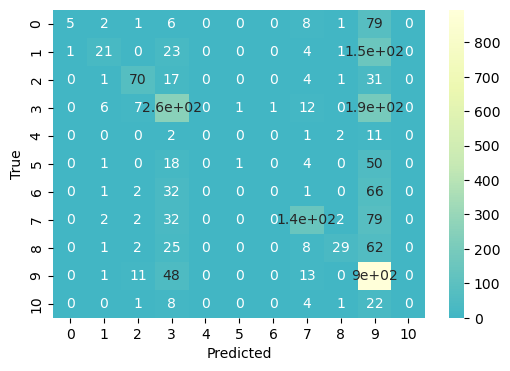

In [47]:
y_predicted = clf_rf.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,cmap='YlGnBu_r', center=0)
plt.xlabel('Predicted')
plt.ylabel('True')
print(clf_rf.score(x_test,y_test))
plt.show()

0.6124343964473153


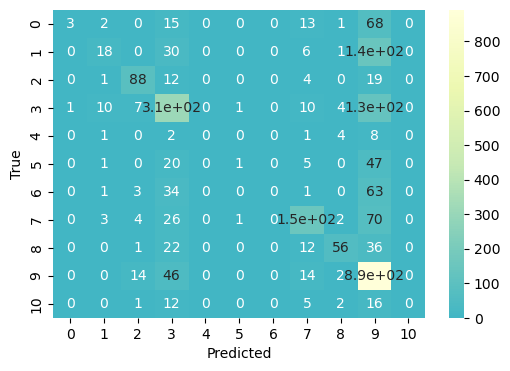

In [48]:
y_predicted = clf_svm.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,cmap='YlGnBu_r', center=0)
plt.xlabel('Predicted')
plt.ylabel('True')
print(clf_svm.score(x_test,y_test))
plt.show()

0.6160678239806218


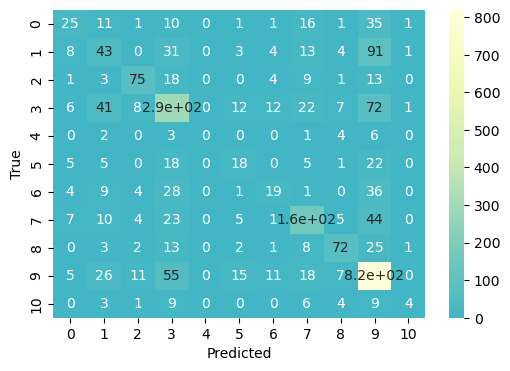

In [49]:
y_predicted = clf_lr.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,cmap='YlGnBu_r', center=0)
plt.xlabel('Predicted')
plt.ylabel('True')
print(clf_lr.score(x_test,y_test))
plt.show()

0.6233346790472346


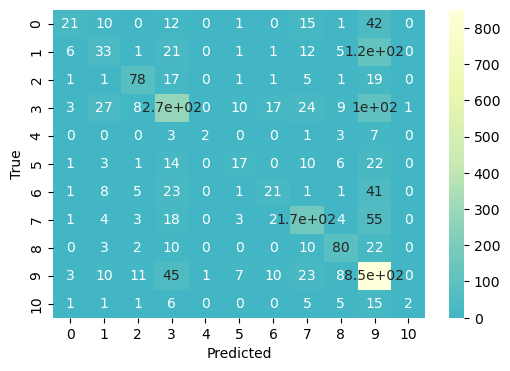

In [50]:
y_predicted = clf_XGBC.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,cmap='YlGnBu_r', center=0)
plt.xlabel('Predicted')
plt.ylabel('True')
print(clf_XGBC.score(x_test,y_test))
plt.show()